# Scientific Programming with Python
## Assignment: Matplotlib and Data Visualization
### SciPro_ID: 2024WS_93
####
#### Karl N. Kirschner, 
#### Department of Computer Science, University of Applied Sciences Bonn-Rhein-Sieg, Sankt Augustin, Germany

#### Date: 15.12.2024
#####
#### Goal: Familiarize myself with matplotlib, explore data and practice scientific programming concepts.

#### Task:
Explore the "Lottery Mega Millions Winning Numbers since 2002"[1] dataset and work with Python tools like Pandas[2], NumPy[3], Matplotlib[4]. 

##### Import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
lottery_winning_numbers = pd.read_csv('Lottery_Mega_Millions_Winning_Numbers__Beginning_2002.csv')

lottery_winning_numbers

,Draw Date,Winning Numbers,Mega Ball,Multiplier
0,09/25/2020,20 36 37 48 67,16,2.0
1,09/29/2020,14 39 43 44 67,19,3.0
2,10/02/2020,09 38 47 49 68,25,2.0
3,10/06/2020,15 16 18 39 59,17,3.0
4,10/09/2020,05 11 25 27 64,13,2.0
...,...,...,...,...
2349,11/29/2024,03 29 34 37 38,17,2.0
2350,12/03/2024,52 60 61 66 67,23,4.0
2351,12/06/2024,16 21 33 39 45,24,2.0
2352,12/10/2024,12 14 26 48 52,21,5.0


#### Data cleaning

In [3]:
# Convert "Draw Date" to dateformat
lottery_winning_numbers['Draw Date'] = pd.to_datetime(lottery_winning_numbers['Draw Date'])

# Sort by "Draw Date"
lottery_winning_numbers = lottery_winning_numbers.sort_values(by='Draw Date')
lottery_winning_numbers = lottery_winning_numbers.reset_index(drop=True)

In [4]:
# The "Megaplier" was first introduced in Januar 2011. [5]
lottery_winning_numbers = lottery_winning_numbers.rename(columns={'Multiplier': 'Megaplier'})

# Delete NaN columns
lottery_without_megaplier = lottery_winning_numbers[lottery_winning_numbers['Megaplier'].isna()]
lottery_without_megaplier = lottery_without_megaplier.drop(columns=['Megaplier'])
lottery_without_megaplier.reset_index(drop=True, inplace=True)

In [5]:
lottery_without_megaplier

,Draw Date,Winning Numbers,Mega Ball
0,2002-05-17,15 18 25 33 47,30
1,2002-05-21,04 28 39 41 44,9
2,2002-05-24,02 04 32 44 52,36
3,2002-05-28,06 21 22 29 32,24
4,2002-05-31,12 28 45 46 52,47
...,...,...,...
898,2010-12-31,10 12 13 35 56,9
899,2011-01-04,04 08 15 25 47,42
900,2011-01-07,04 22 42 46 53,20
901,2011-01-11,01 04 11 16 45,37


In [6]:
winning_numbers_array = []
mega_ball_array = []
megaplier_array = []

for _, row in lottery_winning_numbers.iterrows():
    winning_numbers = list(map(int, row['Winning Numbers'].split()))
    winning_numbers_array.append(np.array(winning_numbers))
    
    mega_ball_array.append(int(row['Mega Ball']))
    
    if not pd.isna(row['Megaplier']):
        megaplier_array.append(int(row['Megaplier']))
    else:
        continue

winning_numbers_array = np.array(winning_numbers_array)
mega_ball_array = np.array(mega_ball_array)
megaplier_array = np.array(megaplier_array)

#### Work with the data

In [7]:
# Calculate the highest, lowest, and average values for Mega Ball and Megaplier
max_mega_ball = np.max(mega_ball_array)
min_mega_ball = np.min(mega_ball_array)
avg_mega_ball = np.mean(mega_ball_array)

max_megaplier = np.max(megaplier_array)
min_megaplier = np.min(megaplier_array)
avg_megaplier = np.mean(megaplier_array)

In [8]:
winning_numbers_all = np.concatenate(winning_numbers_array)

drawing_averages = [np.mean(drawing) for drawing in winning_numbers_array]

# Find numbers that never appeared
all_numbers = set(range(1, 76))
appeared_numbers = set(winning_numbers_all)
missing_numbers = all_numbers - appeared_numbers

# Find the most frequent number
unique, counts = np.unique(winning_numbers_all, return_counts=True)
most_frequent_number = unique[np.argmax(counts)]
most_frequent_count = np.max(counts)

In [9]:
print(f"Mega Ball - Max: {max_mega_ball}, Min: {min_mega_ball}, Avg: {avg_mega_ball:.2f}")
print(f"Megaplier - Max: {max_megaplier}, Min: {min_megaplier}, Avg: {avg_megaplier:.2f}")

print()

print(f"Average number for all drawings: {np.mean(drawing_averages):.2f}")
print(f"Numbers that never appeared: {sorted(missing_numbers)}")
print(f"Most frequent number: {most_frequent_number} (appeared {most_frequent_count} times)")

Mega Ball - Max: 52, Min: 1, Avg: 17.93
Megaplier - Max: 5, Min: 2, Avg: 3.30

Average number for all drawings: 31.71
Numbers that never appeared: []
Most frequent number: 31 (appeared 224 times)


#### Plot:

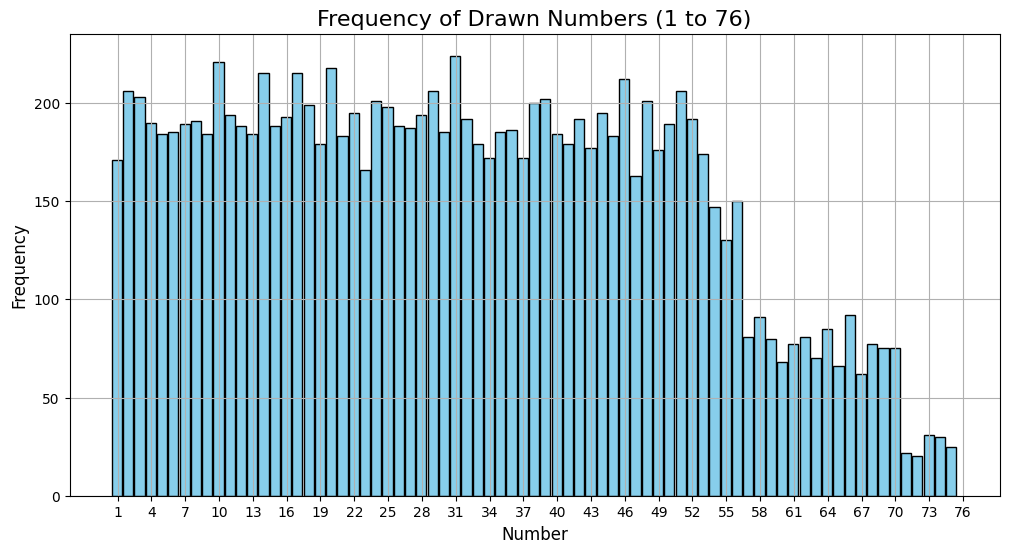

In [10]:
all_numbers = winning_numbers_all
plt.figure(figsize=(12, 6))

plt.hist(all_numbers, bins=np.arange(1, 77) - 0.5, edgecolor='black', color='skyblue', width=0.9)

plt.title("Frequency of Drawn Numbers (1 to 76)", fontsize=16)
plt.xlabel("Number", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(np.arange(1, 77, 3))

plt.grid(True)
plt.show()


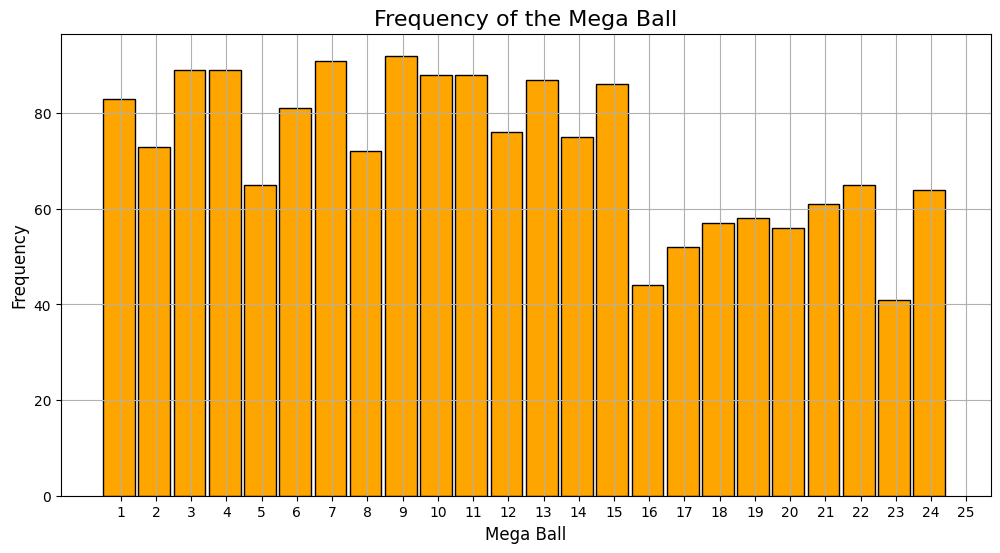

In [11]:
plt.figure(figsize=(12, 6))
plt.hist(mega_ball_array, bins=np.arange(1, 26) - 0.5, edgecolor='black', color='orange', width=0.9)
plt.title("Frequency of the Mega Ball", fontsize=16)
plt.xlabel("Mega Ball", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(np.arange(1, 26))

plt.grid(True)
plt.show()

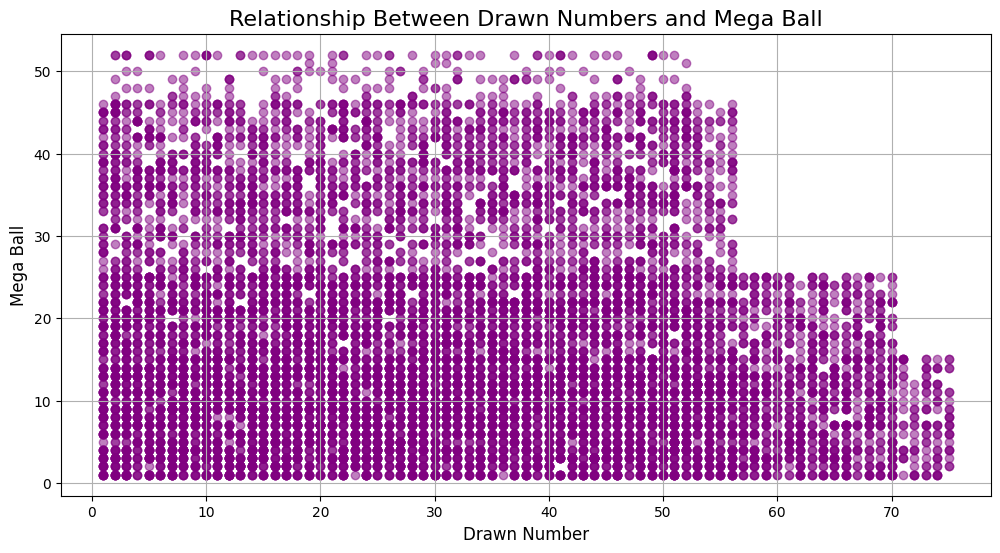

In [12]:
flattened_winning_numbers = np.concatenate(winning_numbers_array)
mega_ball_pairs = list(zip(flattened_winning_numbers, np.repeat(mega_ball_array, 5)))

plt.figure(figsize=(12, 6))
plt.scatter([pair[0] for pair in mega_ball_pairs], [pair[1] for pair in mega_ball_pairs], color='purple', alpha=0.5)
plt.title("Relationship Between Drawn Numbers and Mega Ball", fontsize=16)
plt.xlabel("Drawn Number", fontsize=12)
plt.ylabel("Mega Ball", fontsize=12)
plt.grid(True)
plt.show()

#### Conclusion:
##### The analysis of the Mega Millions data reveals some interesting insights into the behavior of both the drawn numbers and the Mega Ball, as well as the Megaplier.

##### Mega Ball: 
The average Mega Ball value is 17.93, which is relatively low considering it could range from 1 to 52. This suggests that the Mega Ball tends to be drawn from the lower half of its possible range, with many occurrences falling below 20.

##### Megaplier: 
The Megaplier shows a minimum of 2, a maximum of 5, and an average of 3.30. This places the Megaplier slightly below the middle of its range, indicating that the higher multipliers (4 and 5) are less frequent compared to lower values like 2 and 3.

##### Drawn Numbers: 
The average of the drawn numbers is 31.71, which is closely aligned with the most frequently drawn number, 31. This highlights a tendency for numbers around the mid-point of the possible range (1–76) to be drawn more often. Moreover, every number from 1 to 76 has been drawn at least once from 2002 to 2024.

##### The plots reveal a clear trend: 
Numbers like 23, 34, 37, and especially numbers above 54 are drawn much less frequently than others. This suggests that certain numbers appear less often, possibly due to randomness or other factors in the drawing process.

##### Mega Ball Distribution: 
The Mega Ball is most frequently drawn between numbers 1 and 15, with the exception of 2, 5, and 8. This indicates a strong bias toward lower Mega Ball values.

##### Relationship between Drawn Numbers and Mega Balls: 
The scatter plot reveals that there is no clear relationship between higher drawn numbers (above 57) and Mega Balls greater than 26. Additionally, a staircase pattern can be observed, where lower Mega Balls are more common than higher ones. Numbers in the range of >45 for the Mega Ball are much less likely to appear compared to lower numbers, reinforcing the idea that higher Mega Balls are less frequent.

In conclusion, the analysis highlights several trends in the Mega Millions draws, from the distribution of the Mega Ball to the frequency of drawn numbers. These findings suggest that there is a general bias toward lower numbers, both in the Mega Ball and the drawn numbers, with some numbers consistently appearing more often than others. Furthermore, the relationship between high numbers and high Mega Balls is limited, with a distinct preference for lower values.

#### References
1. U.S. government, "Lottery Mega Millions Winning Numbers: Beginning 2002" (https://catalog.data.gov/dataset/lottery-mega-millions-winning-numbers-beginning-2002) Online; accessed on December 15, 2024.
2. Pandas via NumFOCUS, Inc., (https://pandas.pydata.org/docs/user_guide/index.html) Online; accessed on December 15, 2024.
3. NumPy Developers, (https://numpy.org/doc/stable/) Online; accessed on December 15, 2024
4. John Hunter, Darren Dale, Eric Firing, Michael Droettboom and the Matplotlib development team; 2012–2024 The Matplotlib development team., (https://matplotlib.org/stable/users/index) Online; accessed on December 15, 2024.
5. Mega Millions, (https://en.wikipedia.org/wiki/Mega_Millions#:~:text=For%20an%20additional%20%241%20per,Jackpot%20wagers%20(where%20offered).) Online; accessed on December 15, 2024. Sadly, I am not allowed to access the official Megamillions Website (https://www.megamillions.com/)